# New York City Schools Project
The aim of the project is understanding the relationships between the schools in NYC and the performance of their students as for their SAT (Scholastic Aptitude Tests) scores. Education in America is a controversial topic given the costs for education and the rumours about inequalities, hence some of the questions we will try to investigate cover the following:
- Is there any difference in performance due to gender?
- Are there degrees of ratial inequality?
- Is criminality in some areas affecting SAT scores?
- What of language proficiency (especially for immigrants)? 

Analyzed datasets are open to be downloaded from https://data.cityofnewyork.us

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In order to work with multiple files and opening them simultaneously, we will:
- Write down a list of file names
- Define a dictionary that will store file names as keys and dataframes as values
- Loop through the list to open all files simultaneously and populate the dictionary

The final outcome we wish to obtain is a dictionary that allows us to access specific dataframes with the following syntax:

**df\[list_item\]**

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

#populate data dictionary with the following structure key:value --> csv_name : pd.read_csv(full_csv_name)

for file in data_files:
    df = pd.read_csv("data_files/{}".format(file)) #create a df by reading a csv. The csv path is built as a string combination
    key = file.replace(".csv","") #build dictionary keys (file names without .csv suffix)
    data[key] = df #populate dictionary by assigning keys (file names) and values (dataframes)


In [3]:
for key in data.keys():
    print(key)

ap_2010
class_size
demographics
graduation
hs_directory
sat_results


From here onwards we can access the full list of dataframes as **VALUES** paired with the keys identified above.  
The whole structure is as follows:  
**data** = dictionary name  
**keys** = file names of the csvs  
**values** = dataframes

In [4]:
data["sat_results"].head() #access value stored in dictionary and retrieve first five rows

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We know already we will need to merge this data somehow to retrieve evidence. As a matter of fact we can try and see in in the early rows we have some common primary key we can use. Let's print the first 3 columns for each dataset.

In [5]:
for key in data.keys():
    print((key), ":", data[key].columns[0:3], "\n")

ap_2010 : Index(['DBN', 'SchoolName', 'AP Test Takers '], dtype='object') 

class_size : Index(['CSD', 'BOROUGH', 'SCHOOL CODE'], dtype='object') 

demographics : Index(['DBN', 'Name', 'schoolyear'], dtype='object') 

graduation : Index(['Demographic', 'DBN', 'School Name'], dtype='object') 

hs_directory : Index(['dbn', 'school_name', 'borough'], dtype='object') 

sat_results : Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers'], dtype='object') 



In [6]:
def recap():
    for key in data.keys():
        first_three_cols = list(data[key].columns[0:3])
        print("\n-------", key, "dataset-------\n",data[key][first_three_cols].head())

recap()


------- ap_2010 dataset-------
       DBN                             SchoolName  AP Test Takers 
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0
1  01M450                 EAST SIDE COMMUNITY HS             19.0
2  01M515                    LOWER EASTSIDE PREP             24.0
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0
4  02M296  High School of Hospitality Management              NaN

------- class_size dataset-------
    CSD BOROUGH SCHOOL CODE
0    1       M        M015
1    1       M        M015
2    1       M        M015
3    1       M        M015
4    1       M        M015

------- demographics dataset-------
       DBN                       Name  schoolyear
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010

------- graduation dataset-------
     D

There's something good we can use, specifically the DBN code - one further detail is that given by the CSD in the class_size dataset, from which we can start to build a dbn code  - but we'll return to this later on.

### Opening .txt files
More onto that we will also pick up as separate dataframes those included in the .txt files containing answers to the huuuuuuuuuge surveys. Also, to pull everything together, we will merge the dataframes together with the [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.

This stacks them together one over the other, putting together columns with the same name and returning NaNs for all those who do not match.

In [7]:
all_survey = pd.read_csv("data_files/survey_all.txt", delimiter = "\t", encoding = "windows-1252")
d75_survey = pd.read_csv("data_files/survey_d75.txt", delimiter = "\t", encoding = "windows-1252")

survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


To double check we did everything right, we can return to the marvelous seaborn visualization.

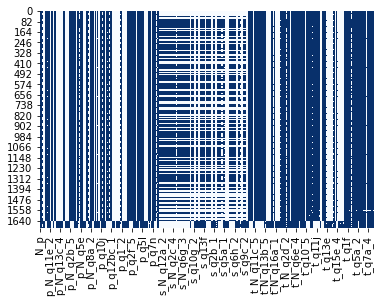

In [8]:
import seaborn as sns
#dataframe_updated = dataframe.set_index('INDEX_TO_CHOOSE')
sns.heatmap(survey.isnull(), cmap="Blues_r", cbar=False)

#for further checks
#sns.heatmap(all_survey.isnull(), cmap="Blues_r", cbar=False)
#sns.heatmap(d75_survey.isnull(), cmap="Blues_r", cbar=False)


In [9]:
print(d75_survey.shape[0])
print(all_survey.shape[0])
print(survey.shape[0])

1646+56

56
1646
1702


1702

It's not easy to spot but we can appreciate that the total number of rows matches the sum of d75_survey + all_survey (breaking point around row 1640)

We will then keep on operating on the data cleanage by:  
- Selecting only a set of rows that are of interest to us  
- Reassign the dataframe to itself, with the 'lighter', more relevant version
- Add the dataframe the our original data dictionary

In [10]:
#generate a new uppercase DBN column that is a copy of the existing one, we we do not alter in any way the original dataset
survey["DBN"] = survey["dbn"]

#select columns to be filtered
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
                 "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
                 "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11",
                 "com_tot_11", "eng_tot_11", "aca_tot_11"]

#reassign survey to the relevant fields only, while keeping all rows
survey = survey.loc[:, survey_fields]

#generate a new value into the dictionary data, assigned to the key "survey"
data["survey"] = survey

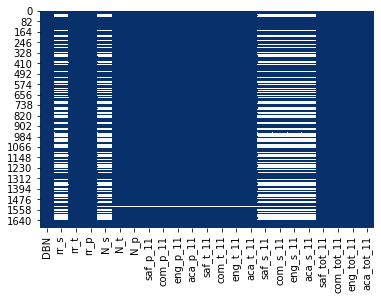

In [11]:
sns.heatmap(survey.isnull(), cmap="Blues_r", cbar=False)

In [12]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

Let's recall the keys list seen earlier, and let's assess the current situation (that includes now "survey"

In [13]:
recap()


------- ap_2010 dataset-------
       DBN                             SchoolName  AP Test Takers 
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0
1  01M450                 EAST SIDE COMMUNITY HS             19.0
2  01M515                    LOWER EASTSIDE PREP             24.0
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0
4  02M296  High School of Hospitality Management              NaN

------- class_size dataset-------
    CSD BOROUGH SCHOOL CODE
0    1       M        M015
1    1       M        M015
2    1       M        M015
3    1       M        M015
4    1       M        M015

------- demographics dataset-------
       DBN                       Name  schoolyear
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010

------- graduation dataset-------
     D

We must recreate the DBN column by the existing info into class_size dataframe. In order to do so will need to manipulate the existing information and columns.  
- Define a new clean padded_csd column
- Ensure "padded_csd" column **stores only 2digit numbers**
- Merge strings into a **single final DBN** column


In [14]:
#work on hs_directory dataframe | create new DBN column into the hs_directory dataframe
data["hs_directory"].loc[:,"DBN"] = data["hs_directory"].loc[:,"dbn"]


#work on class_size dataframe
#lambda to transform single digit numbers into CSD with "0+number" strings. 
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].astype(str).apply(lambda x: x.zfill(2) if len(x) < 2 else x)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

#verify end result
data["class_size"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [15]:
#verify whether all values into strings are 6-digits
data["class_size"]["DBN"].str.len().value_counts()

6    27611
Name: DBN, dtype: int64

### Build up quantitative data: merging scores
We will now get along with our analysis by deploying the first numeric values, made up by the avg. scores per subject merged altogether into a single measure.
What follows is an application of the [pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) function, that:  
- Takes **any iterable** (of strings in this case) and transforms it into a **iterable of numbers**  
- We use this instance to convert Avg. Scores (type = string) into integers and then add them up to generate a single variable
- The latter is done combining pandas functions with vectorized numpy operations (with axis = 1)

In [16]:
data["sat_results"].iloc[20:26]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
20,02M374,GRAMERCY ARTS HIGH SCHOOL,60,391,391,394
21,02M376,NYC ISCHOOL,92,473,483,479
22,02M392,MANHATTAN BUSINESS ACADEMY,s,s,s,s
23,02M393,BUSINESS OF SPORTS SCHOOL,s,s,s,s
24,02M394,EMMA LAZARUS HIGH SCHOOL,79,319,512,357
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,s,s,s


In [17]:
#Convert strings of selected columns to numeric values
columns = ["SAT Math Avg. Score", "SAT Critical Reading Avg. Score", "SAT Writing Avg. Score"]

for col in columns:
    series = pd.to_numeric(data["sat_results"][col], errors="coerce")
    data["sat_results"][col] = series

In [18]:
data["sat_results"].iloc[20:26]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
20,02M374,GRAMERCY ARTS HIGH SCHOOL,60,391.0,391.0,394.0
21,02M376,NYC ISCHOOL,92,473.0,483.0,479.0
22,02M392,MANHATTAN BUSINESS ACADEMY,s,NaN,NaN,NaN
23,02M393,BUSINESS OF SPORTS SCHOOL,s,NaN,NaN,NaN
24,02M394,EMMA LAZARUS HIGH SCHOOL,79,319.0,512.0,357.0
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,NaN,NaN,NaN


### WARNING!
**Skipna is a very important item to be considered, OTHERWISE the resulting sum of NaNs will be a zero. This will eventually break down your future correlations, because imputation phase will handle only missing numbers.**

In [19]:
#add up results of transformed columns into a new col. Done with datframe.sum() method. 
data["sat_results"]["sat_score"] = data["sat_results"].iloc[:,3:6].sum(axis=1, skipna=False)
data["sat_results"].iloc[20:26]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
20,02M374,GRAMERCY ARTS HIGH SCHOOL,60,391.0,391.0,394.0,1176.0
21,02M376,NYC ISCHOOL,92,473.0,483.0,479.0,1435.0
22,02M392,MANHATTAN BUSINESS ACADEMY,s,NaN,NaN,NaN,NaN
23,02M393,BUSINESS OF SPORTS SCHOOL,s,NaN,NaN,NaN,NaN
24,02M394,EMMA LAZARUS HIGH SCHOOL,79,319.0,512.0,357.0,1188.0
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,NaN,NaN,NaN,NaN


### Parsing latlongs
The aim here is to retrieve latlongs to understand if we can identify geographical patterns.

In [20]:
pd.set_option('display.max_colwidth', -1)
data["hs_directory"]["Location 1"][0:5]

0    50 Avenue\r\nX Brooklyn, NY 11223\r\n(40.589238098, -73.981746524)                 
1    284 Baltic Street\r\nBrooklyn, NY 11201\r\n(40.685451806, -73.993491465)           
2    45 35 Van Dam Street\r\nLong Island City, NY 11101\r\n(40.744149536, -73.933626741)
3    509 West 129 Street\r\nNew York, NY 10027\r\n(40.815230365, -73.955201206)         
4    8 21 Bay 25 Street\r\nFar Rockaway, NY 11691\r\n(40.601989336, -73.762834323)      
Name: Location 1, dtype: object

In [21]:
test = data["hs_directory"]["Location 1"].head()

In [22]:
#define a regex pattern with 2 groups (lat and long) and create two different columns in dataframe
pattern = r"\((?P<lat>\d+.\d+).+?(?P<lon>[\-]?\d+.\d+)\)"
data["hs_directory"][["lat", "lon"]] = data["hs_directory"]["Location 1"].str.extract(pattern)

#reconvert series of strings to numeric values
for column in ["lat", "lon"]:
    numeric_series = pd.to_numeric(data["hs_directory"][column], errors = "coerce")
    data["hs_directory"][column] = numeric_series

In [23]:
data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,"50 Avenue\r\nX Brooklyn, NY 11223\r\n(40.589238098, -73.981746524)",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend,21K540,40.589238,-73.981747
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,"284 Baltic Street\r\nBrooklyn, NY 11201\r\n(40.685451806, -73.993491465)",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,15K429,40.685452,-73.993491
2,24Q530,International High School at LaGuardia Community College,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,"45 35 Van Dam Street\r\nLong Island City, NY 11101\r\n(40.744149536, -73.933626741)",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth,24Q530,40.744150,-73.933627
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,"509 West 129 Street\r\nNew York, NY 10027\r\n(40.815230365, -73.955201206)",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville,05M367,40.815230,-73.955201
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\r\nFar Rockaway, NY 11691\r\n(40.601989336, -73.762834323)",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater,27Q260,40.601989,-73.762834


# Combining Data
We need to condense some datasets (class_size, graduation, and demographics) to make sure we have a single DBN.

### Condensing class_size

In [24]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Because we're dealing with high schools, we're only concerned with grades 9 through 12. 
- That means we only want to pick rows where the value in the GRADE column is 09-12.
- Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.


In [25]:
class_size = data["class_size"]

#apply boolean masks and reduce dataset
class_size = class_size[class_size["GRADE "] == "09-12"] #filter only GRADE 09-12
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"] #filter 2

print(class_size["GRADE "].value_counts())
print(class_size["PROGRAM TYPE"].value_counts())

09-12    6513
Name: GRADE , dtype: int64
GEN ED    6513
Name: PROGRAM TYPE, dtype: int64


As a last item, we will condense the dataset to have only unique values of DBN - thus having only averages for all the other columns.

In [26]:
#you will get the same results by using groupby
#class_size.groupby("DBN").agg("mean").reset_index()
class_size = class_size.pivot_table(index="DBN").reset_index()

#reassign class_size to dictionary and print first 5 rows
data["class_size"] = class_size
data["class_size"].head()

,DBN,AVERAGE CLASS SIZE,CSD,NUMBER OF SECTIONS,NUMBER OF STUDENTS / SEATS FILLED,SIZE OF LARGEST CLASS,SIZE OF SMALLEST CLASS
0,01M292,22.564286,1,4.000000,88.0000,26.571429,18.50
1,01M332,22.000000,1,2.000000,46.0000,23.500000,21.00
2,01M378,33.000000,1,1.000000,33.0000,33.000000,33.00
3,01M448,22.231250,1,4.750000,105.6875,27.062500,18.25
4,01M450,21.200000,1,2.733333,57.6000,22.866667,19.40


### Condensing demographics
The aim here is to keep only rows with years 2011-2012 to match what we have in the sat_results dataset.

In [27]:
data["demographics"].head(1)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8


In [28]:
#understand value type of column schoolyear
print(data["demographics"]["schoolyear"].apply(type).value_counts())

<class 'int'>    10075
Name: schoolyear, dtype: int64


In [29]:
bool_mask = data["demographics"]["schoolyear"] == 20112012
data["demographics"] = data["demographics"][bool_mask]

data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


### Condensing graduation
In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.
- Check data type for "Cohort"
- filter for Cohort == 2006
- filter for Demographic == "Total Cohort"

In [30]:
data["graduation"]["Cohort"].apply(type).value_counts()

<class 'str'>    25096
Name: Cohort, dtype: int64

In [31]:
#define boolean masks
cohort_filter = data["graduation"]["Cohort"] == "2006"
demographics_filter = data["graduation"]["Demographic"] == "Total Cohort"

#apply and reassign
data["graduation"] = data["graduation"][cohort_filter] #apply first filter and reassign
data["graduation"] = data["graduation"][demographics_filter] #apply second filter and reassign to avoid warning
data["graduation"].head()


c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


### ap_2010 - conversion and cleaning
Converting ap_2010 string columns into numeric onces

In [32]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
     data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce") #transform and apply

print(data["ap_2010"][cols].dtypes) #check successul transform
    

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


## MERGING SECTION
Which merge strategy?
Because this project is concerned with **determing demographic factors that correlate with SAT score**, we'll want to preserve **as many rows as possible from sat_results while minimizing null values**.  
As a consequence, the best decision is keeping sat results as a beginning table and left joining all others.

- Create a combined starting dataset from data["sat_results"]
- start the left joining with all the others

In [33]:
for key in data.keys():
    print(key)

ap_2010
class_size
demographics
graduation
hs_directory
sat_results
survey


In [34]:
combined = data["sat_results"]
print(combined.shape)

(478, 7)


In [35]:
combined = combined.merge(data["ap_2010"], how="left", on="DBN") #join first dataset
print(combined.shape)

(479, 11)


We will now identify and clean the duplicate row

In [36]:
combined[combined.duplicated(subset="DBN", keep=False)]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
95,04M610,YOUNG WOMEN'S LEADERSHIP SCHOOL,70,432.0,446.0,448.0,1326.0,THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HARLEM,41.0,55.0,29.0
96,04M610,YOUNG WOMEN'S LEADERSHIP SCHOOL,70,432.0,446.0,448.0,1326.0,YOUNG WOMEN'S LEADERSHIP SCH,NaN,NaN,NaN


In [37]:
combined = combined.drop_duplicates(subset="DBN", keep="first")
print(combined.shape)

(478, 11)


Get on with the merging

In [38]:
combined = combined.merge(data["graduation"], how="left", on="DBN") #join second dataset

print(combined.shape)

(478, 33)


Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

In [39]:
combined["DBN"].value_counts().value_counts()

1    478
Name: DBN, dtype: int64

In [40]:
datasets = ["class_size","demographics","survey","hs_directory"]

for d in datasets:
    combined = combined.merge(data[d], how="inner", on="DBN")

print(combined.shape) #verify how many rows we have kept


combined.head(2)


(362, 164)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\r\nNew York, NY 10002\r\n(40.713763947, -73.98526004)",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\r\nNew York, NY 10002\r\n(40.712331851001, -73.984796625)",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side,40.712332,-73.984797


### Missing data handling - means
To allow us to work in the right condition, we need to manage missing data. We'll go easy peasy by applying good stuff old mean to all numeric columns.

In [41]:
df_means = combined.mean() #calculate df means
combined = combined.fillna(df_means) #assign those values (column-based) to the DF NaNs

print(combined.isnull().sum().sum()) #check number of null values - should be plenty

combined = combined.fillna(0) #we have transformed all NaNs into zeros
print(combined.isnull().sum().sum()) #check again number of NaNs --> goes to zero

7013
0


In [42]:
combined.iloc[15:21,0:7] #handled this way to idenfity indexes 18,19,20

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
15,02M316,"URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN, THE",42,373.000000,370.000000,384.000000,1127.000000
16,02M374,GRAMERCY ARTS HIGH SCHOOL,60,391.000000,391.000000,394.000000,1176.000000
17,02M376,NYC ISCHOOL,92,473.000000,483.000000,479.000000,1435.000000
18,02M392,MANHATTAN BUSINESS ACADEMY,s,404.035928,419.577844,399.517964,1223.131737
19,02M393,BUSINESS OF SPORTS SCHOOL,s,404.035928,419.577844,399.517964,1223.131737
20,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,404.035928,419.577844,399.517964,1223.131737


We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [43]:
combined["school_dist"] = combined["DBN"].apply(lambda x: x[0:2])

combined[["school_dist", "DBN"]].head()

,school_dist,DBN
0,01,01M292
1,01,01M448
2,01,01M450
3,01,01M509
4,01,01M539


# Correlations, Plots and Mapping
Before running in-depth analysis the best thing to do is identify columns that show a correlation somehow, so we have meaningful insights to present. The selected metric is the r-value, aka Pearson's Correlation.

In general, **r values above .25 or below -.25 are enough to qualify a correlation as interesting**.  
An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape."

Because we're **interested in exploring the fairness of the SAT**, a strong positive or negative correlation between **a demographic factor like race or gender and SAT score would be an interesting result meriting investigation**. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

We can use the pandas [pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set - and it requires non-null rows!





In [44]:
correlations = combined.corr()
correlations.head(5)

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929190,0.982957,0.986821,0.490445,0.483638,0.441957,0.290778,0.585885,0.659911,...,NaN,NaN,NaN,-0.060728,-0.070044,0.054686,0.052573,0.044282,-0.120910,-0.126118
SAT Math Avg. Score,0.929190,1.000000,0.931539,0.972664,0.545772,0.533363,0.469563,0.379992,0.543271,0.638140,...,NaN,NaN,NaN,-0.060347,-0.060426,0.055175,0.081388,0.074248,-0.135355,-0.119748
SAT Writing Avg. Score,0.982957,0.931539,1.000000,0.987835,0.502115,0.495783,0.452208,0.284502,0.597772,0.671646,...,NaN,NaN,NaN,-0.063197,-0.090757,0.034513,0.023768,0.016220,-0.102072,-0.143297
sat_score,0.986821,0.972664,0.987835,1.000000,0.523383,0.514572,0.463458,0.326443,0.585014,0.667920,...,NaN,NaN,NaN,-0.062516,-0.074699,0.049165,0.054450,0.046673,-0.122115,-0.131803
AP Test Takers,0.490445,0.545772,0.502115,0.523383,1.000000,0.992192,0.901513,0.603103,0.241593,0.302311,...,NaN,NaN,NaN,0.004123,0.061351,0.091323,0.107945,0.105223,-0.104516,-0.053127


Notice how the correlation runs in diagonal, scoring 1 because it compares the same dimensions

In [45]:
correlations = correlations["sat_score"]
correlations.sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987835
SAT Critical Reading Avg. Score         0.986821
SAT Math Avg. Score                     0.972664
Advanced Regents - % of cohort          0.771787
Advanced Regents - % of grads           0.740406
Total Regents - % of cohort             0.667920
white_per                               0.621986
Total Grads - % of cohort               0.585014
asian_per                               0.571624
AP Test Takers                          0.523383
Total Exams Taken                       0.514572
Total Regents - % of grads              0.494469
asian_num                               0.476277
Number of Exams with scores 3 4 or 5    0.463458
white_num                               0.450429
N_s                                     0.424319
N_p                                     0.421948
total_students                          0.408762
NUMBER OF STUDENTS / SEATS FILLED       0.395932
female_num          

Some nice observations we can gather immediately:  

### ------------- Evidence ---------------
- Obvious strong correlation between sat_score and its components (Writing, Critical, Math)  
- Significant racial inequalit between **white_per, asian_per, black_per, hispanic_per** (2vs2)  
- Solid correlation between the number of exams taken and sat: more exams you take, higher scores you'll have.  
- Strong negative correlation with ell (english language learners): if people take the exam and to not know english...
- Total_enrollment has a strong positive correlation with sat_score. Larger schools tend to do better on the SAT. Might this be a bias for "important names"?
### -------------------------------------------

Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the [pandas.DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.




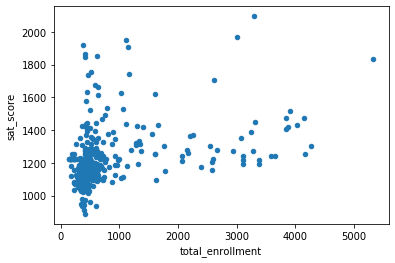

In [46]:
combined.plot.scatter(x="total_enrollment", y="sat_score")

Corrleation is actually so-so, especially because there's a lot of variability in the top left corner. The **density of the bottom left corner is likelt to be what is ranking up the sat_score**. It's worth extracting the names of the schools in this cluster so we can research them further.  
So we will:  
- Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000.  
- Assign the result to low_enrollment.

In [47]:
#not super best practice chained assignment. remember https://www.dataquest.io/blog/settingwithcopywarning/
low_enrollment = combined[combined["total_enrollment"] < 1000][combined["sat_score"] < 1000] 

low_enrollment["SCHOOL NAME"]

c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


90     INTERNATIONAL COMMUNITY HIGH SCHOOL             
124    ACADEMY FOR LANGUAGE AND TECHNOLOGY             
125    BRONX INTERNATIONAL HIGH SCHOOL                 
138    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL           
140    INTERNATIONAL SCHOOL FOR LIBERAL ARTS           
175    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
178    HIGH SCHOOL OF WORLD CULTURES                   
187    BROOKLYN INTERNATIONAL HIGH SCHOOL              
224    INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
236    IT TAKES A VILLAGE ACADEMY                      
252    MULTICULTURAL HIGH SCHOOL                       
285    PAN AMERICAN INTERNATIONAL HIGH SCHOOL          
Name: SCHOOL NAME, dtype: object

Most of the high schools with low total enrollment and low SAT scores **have high percentages of English language learners**. To explore this relationship further, let's plot out ell_percent vs sat_score.

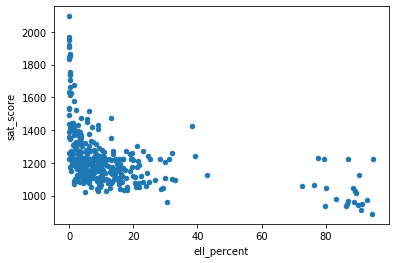

In [48]:
combined.plot.scatter(x="ell_percent", y="sat_score")

However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier. **The beginning projection data centers the focus on the reference area of NY.** In order to explore this relationship, we'll want to map out **ell_percent** by school district. The map will show us which areas of the city have a lot of English language learners.

In [49]:
from mpl_toolkits.basemap import Basemap

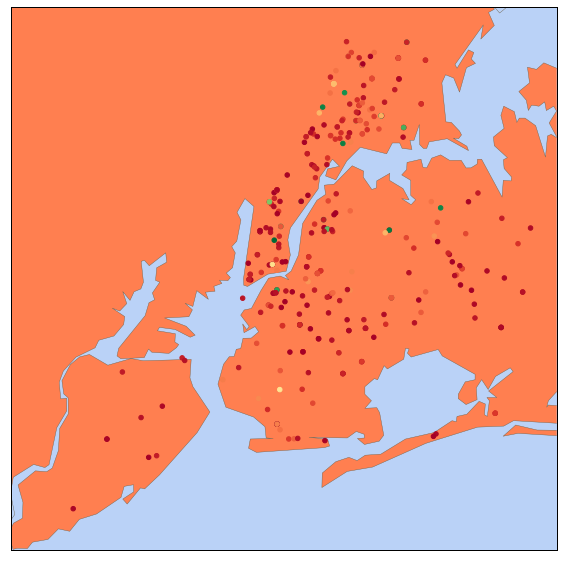

In [50]:
plt.figure(figsize=(10,10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, #lower left corner latitude...
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h' #slows down terribly the creation of the map
)

m.drawmapboundary(fill_color='#bad2f7')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

#create lists of coordinates
longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

#create scatter plot of latlongs. C is used to color a specific subset. Much like Hue parameter.
m.scatter(longitudes,latitudes, c=combined["ell_percent"], s=20, zorder=2, latlon=True, cmap="RdYlGn")
plt.show()

In this case we plotted ell_percent by school. By passing **the keyword argument c=combined["ell_percent"]**, we can obtain a school with a **low ell_percent red and a school with a high ell_percent green**. We can specify the colormap we want to use by passing the cmap keyword argument to the scatter() method. This is related to the color palette thatyou can find [here](https://matplotlib.org/users/colormaps.html)

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen.  
One way to **make very granular statistics easier to read is to aggregate them**. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

In [51]:
districts = combined.groupby("school_dist").agg('mean') #aggregate by district number
districts.reset_index(inplace=True) #reindex df by removing "school_dist" from its index

In [52]:
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.608658,444.176397,424.814746,1295.599800,128.908454,201.516827,157.495833,158.713390,75.438767,...,0.0,0.0,0.0,4.203762,2.964120,1132.687384,1.104040e+06,1.070612e+09,40.739699,-73.991386
2,03,428.508982,437.977794,426.879491,1293.366267,156.183494,244.522436,193.087500,183.496764,74.004553,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,397.166667,411.333333,398.666667,1207.166667,129.014423,181.685897,150.633333,123.666667,72.300000,...,0.0,0.0,0.0,11.000000,8.000000,3047.833333,1.056517e+06,1.016738e+09,40.793572,-73.942534
4,05,427.147990,438.225406,419.645423,1285.018820,85.722527,115.725275,142.464286,143.805825,75.171870,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


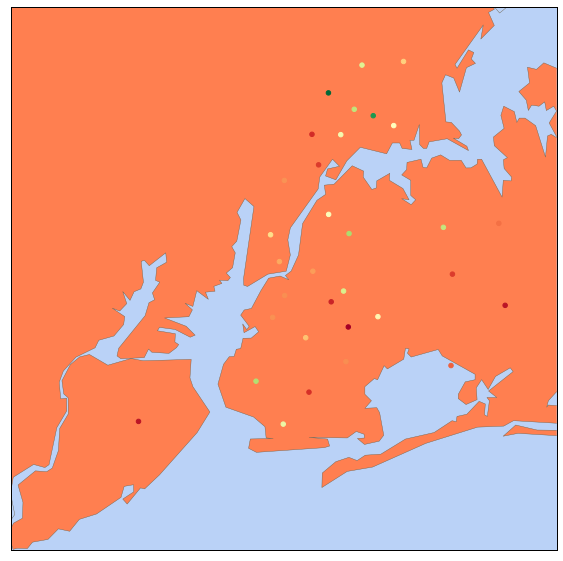

In [53]:
plt.figure(figsize=(10,10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, #lower left corner latitude...
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h' #slows down terribly the creation of the map
)

m.drawmapboundary(fill_color='#bad2f7')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

#create lists of coordinates
longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()

#create scatter plot of latlongs. C is used to color a specific subset. Much like Hue parameter.
m.scatter(longitudes,latitudes, c=districts["ell_percent"], s=20, zorder=2, latlon=True, cmap="RdYlGn")
plt.show()

The result of this thing here shows that districts on top of the map have on average more people learning english.

# Correlation analysis

Let's define a subset of the combined dataset, taking only a list of columns related to the survey questions.

In [54]:
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers ',
       'Total Exams Taken',
       ...
       'Location 1', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'lat', 'lon', 'school_dist'],
      dtype='object', length=165)

In [55]:
survey_col_headers = list(data["survey"])
survey_col_headers.insert(0, "sat_score") #add sat_score in first position
survey_col_headers.remove("DBN")

In [56]:
combined_filtered = combined[survey_col_headers]
combined_filtered.corr()

,sat_score,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
sat_score,1.000000,0.231890,-0.024694,0.046779,0.424319,0.292384,0.421948,0.121469,-0.116765,0.019273,...,0.034650,0.130313,0.336485,0.186068,0.212497,0.338242,0.317442,0.074869,0.098118,0.189005
rr_s,0.231890,1.000000,0.402501,0.403401,0.031318,-0.086172,0.095050,0.250441,0.185001,0.189045,...,0.111195,0.145542,0.272302,0.179738,0.175429,0.231552,0.288637,0.174225,0.186081,0.231035
rr_t,-0.024694,0.402501,1.000000,0.346807,-0.015049,0.113688,0.062705,0.065995,0.116726,0.091203,...,0.303805,0.267558,0.165342,0.170224,0.181589,0.158456,0.191566,0.299901,0.292801,0.248923
rr_p,0.046779,0.403401,0.346807,1.000000,-0.141818,-0.174747,0.219960,0.357635,0.307531,0.338042,...,0.169243,0.201454,0.327639,0.323465,0.301972,0.341568,0.356206,0.314653,0.313287,0.333503
N_s,0.424319,0.031318,-0.015049,-0.141818,1.000000,0.919962,0.842402,-0.325902,-0.386814,-0.218896,...,0.052600,0.052080,-0.033690,-0.205369,-0.049494,-0.072246,-0.076636,-0.123325,-0.046881,-0.086621
N_t,0.292384,-0.086172,0.113688,-0.174747,0.919962,1.000000,0.769850,-0.387717,-0.392402,-0.247743,...,0.104267,0.078752,-0.065559,-0.191420,-0.035548,-0.082751,-0.118803,-0.090723,-0.014734,-0.079120
N_p,0.421948,0.095050,0.062705,0.219960,0.842402,0.769850,1.000000,-0.169419,-0.233668,-0.067261,...,0.092909,0.107674,0.081527,-0.073947,0.059594,0.059686,0.046556,-0.004393,0.061694,0.044703
saf_p_11,0.121469,0.250441,0.065995,0.357635,-0.325902,-0.387717,-0.169419,1.000000,0.770973,0.787942,...,0.259446,0.323715,0.678316,0.514518,0.551528,0.592249,0.805810,0.561681,0.580376,0.628606
com_p_11,-0.116765,0.185001,0.116726,0.307531,-0.386814,-0.392402,-0.233668,0.770973,1.000000,0.917331,...,0.298995,0.352365,0.466539,0.464165,0.498640,0.509617,0.577264,0.657342,0.625666,0.665061
eng_p_11,0.019273,0.189045,0.091203,0.338042,-0.218896,-0.247743,-0.067261,0.787942,0.917331,1.000000,...,0.314405,0.360360,0.489951,0.451822,0.550196,0.545517,0.607477,0.636204,0.674943,0.676328


In [57]:
#take only the first column and sort values descending
combined_filtered.corr()["sat_score"].sort_values(ascending=False)

sat_score     1.000000
N_s           0.424319
N_p           0.421948
aca_s_11      0.338242
saf_s_11      0.336485
saf_tot_11    0.317442
saf_t_11      0.312497
N_t           0.292384
rr_s          0.231890
eng_s_11      0.212497
aca_tot_11    0.189005
com_s_11      0.186068
aca_t_11      0.130313
saf_p_11      0.121469
eng_tot_11    0.098118
com_t_11      0.080251
com_tot_11    0.074869
rr_p          0.046779
eng_t_11      0.034650
aca_p_11      0.033644
eng_p_11      0.019273
rr_t         -0.024694
com_p_11     -0.116765
Name: sat_score, dtype: float64

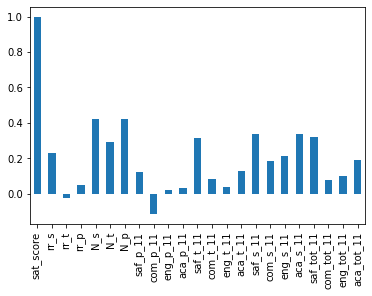

In [58]:
#plot on bar charts the relationships between sat_score and all the other dataset columns
combined_filtered.corr()["sat_score"].plot(kind="bar")

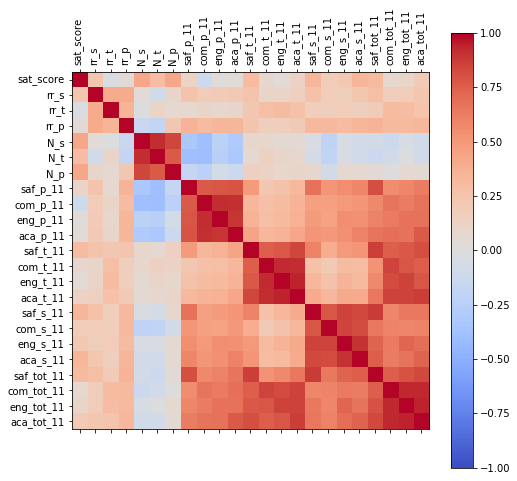

In [59]:
#combined_filtered.corr()
#plt.matshow(combined_filtered.corr())
#plt.show()

corr = combined_filtered.corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(combined_filtered.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combined_filtered.columns)
ax.set_yticklabels(combined_filtered.columns)
plt.show()


4 major vectors of questions: Safety and Respect, Communication, Engagement, Academic Expectations.  
According to the correlation matrix above, it looks like:  
- There is a strong correlation between N_s, N_p and sat_score. This is unsurprisingly related to the fact that schools with more students (thus higher N_s) perform better on sat tests.  
- There's also an interesting and strong correlation between the **Safety and Respect perceived by Students and teachers and the sat score**.   
- Also, a notable case is the one related between the **Academic expectations by students and Sat**.

Overall, we can assess that the **perception of safety and the academic expectations by students are important drivers for them to stay focused on their studies** and get the best from the tests.

# Plotting Safety
On the highlights above we can try and map out safety by neighborhood for students.

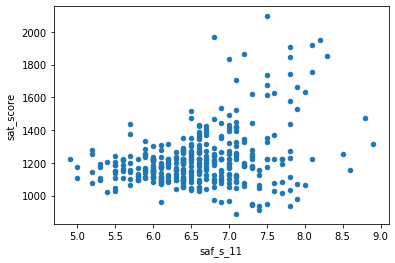

In [60]:
combined.plot.scatter(x="saf_s_11", y="sat_score")

There is a relatively strong correlation between **safety score** and the **sat_score**. There are only a handful of schools in the top right corner that display high scores in safety and high scores in satisfaction, hence they might be responsible of the correlation we observed.

c:\users\niccolo.longoni\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


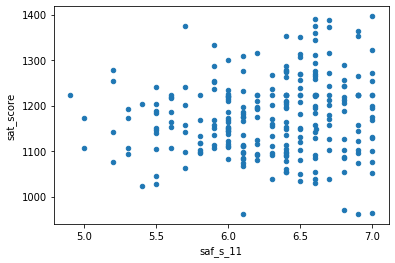

In [61]:
subset = combined[combined["saf_s_11"] <= 7][combined["sat_score"] <= 1400]

subset.plot.scatter(x="saf_s_11", y="sat_score")

By removing outliers and creating a subset, it looks like the correlation isn't that strong. We can try to replicate what we did before, that is, mapping out safety scores.
- Compute the average safety score for each district.  
- Make a map that shows safety scores by district.
We already computed the averages by districts earlier, so it should be easy to get them again.

In [62]:
districts[["school_dist","saf_s_11","lat","lon"]]

,school_dist,saf_s_11,lat,lon
0,01,6.768199,40.719022,-73.982377
1,02,6.910608,40.739699,-73.991386
2,03,6.716667,40.781574,-73.977370
3,04,6.783333,40.793572,-73.942534
4,05,6.314286,40.817077,-73.949251
5,06,6.950000,40.848970,-73.932502
6,07,6.800000,40.816815,-73.919971
7,08,6.364472,40.823803,-73.866087
8,09,6.655000,40.836349,-73.906240
9,10,6.577273,40.870345,-73.898360


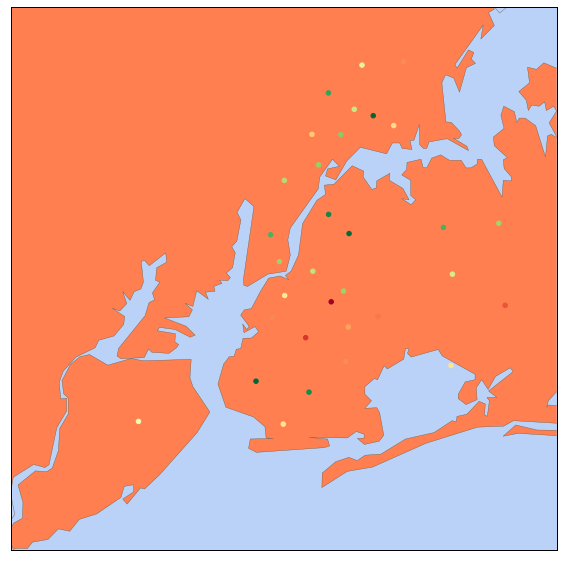

In [63]:
plt.figure(figsize=(10,10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, #lower left corner latitude...
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h' #slows down terribly the creation of the map
)

m.drawmapboundary(fill_color='#bad2f7')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

#create lists of coordinates
longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()

#create scatter plot of latlongs. C is used to color a specific subset. Much like Hue parameter.
m.scatter(longitudes,latitudes, c=districts["saf_s_11"], s=20, zorder=2, latlon=True, cmap="RdYlGn")
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.

# Investigating racial differences on Sat Scores
Given these columns that assess percentages of students per racial type (**white_per, asian_per, black_per, hispanic_per**), we can try and plot them against sat performances.


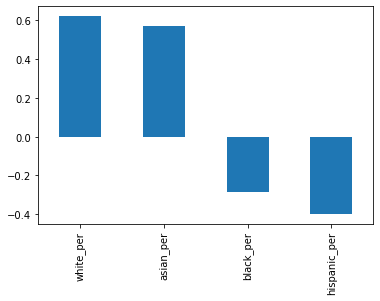

In [64]:
racial = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][racial].plot.bar()

As mentioned above, it looks like the gender inequality is quite evident in the way Whites and Asians have a strong correalation with high SAT scores, while the opposite goes for black and hispanic people. However this might be related to other aspects, such as schools with high black/hispanic % being in difficult positions (e.g. areas with low perceived safety).

## Investigating Hispanic_per

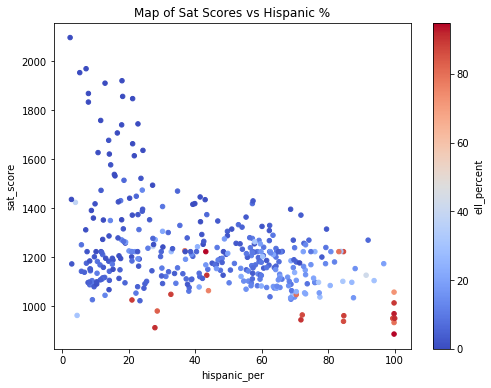

In [65]:
fig, ax = plt.subplots() #needed to avoid the displacement of x axis that is not shown
combined.plot.scatter(figsize= (8,6),
                      x="hispanic_per", y="sat_score",
                      c="ell_percent", cmap = "coolwarm",
                      title="Map of Sat Scores vs Hispanic %",
                      ax=ax)

There is good evidence here that a set of **schools with extremely high percentages of spanish students are also sharing high levels of english learners AND low sat_score levels**.  
The reverse seems to be happening on the top left corner of the graph.Let's try to identify the schools then.

In [66]:
combined[combined["hispanic_per"] >= 95.0]["school_name"]

44     Manhattan Bridges High School                           
81     Washington Heights Expeditionary Learning School        
88     Gregorio Luperon High School for Science and Mathematics
124    Academy for Language and Technology                     
140    International School for Liberal Arts                   
175    Pan American International High School at Monroe        
252    Multicultural High School                               
285    Pan American International High School                  
Name: school_name, dtype: object

All the schools listed above are schools dedicated mostly to recent immigrants from other countries: this explains the high% of Spanish students AND the low sat scores.

In [67]:
combined[combined["sat_score"] >= 1800]["school_name"]

5      Bard High School Early College                                      
37     Stuyvesant High School                                              
78     High School for Mathematics, Science and Engineering at City College
150    Bronx High School of Science                                        
154    High School of American Studies at Lehman College                   
186    Brooklyn Technical High School                                      
301    Townsend Harris High School                                         
326    Queens High School for the Sciences at York College                 
355    Staten Island Technical High School                                 
Name: school_name, dtype: object

By looking at the top left corner schools instead, we can find out that they are instead the top of the education: either they have a fame of competition among themselves to achieve top results, or they receive additional funding. also, for instance, the Stuyvesant school has records of 4 nobel prizes. This does not explain why the % of hispanic students is so low, but we can infer that the native, white elites of NYC aim at these schools for their children.

## Investigating Gender Percentages

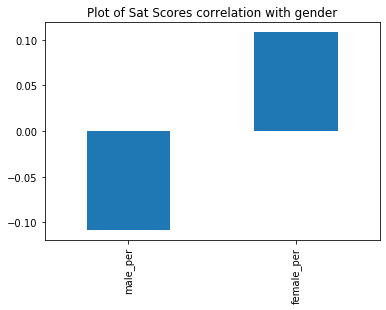

In [68]:
combined.corr()["sat_score"][["male_per","female_per"]].plot(kind="bar", title="Plot of Sat Scores correlation with gender")

Do female perform better against males? This would be a curious case, let's try to plot this against the schools and sat scores with a scatter plot.

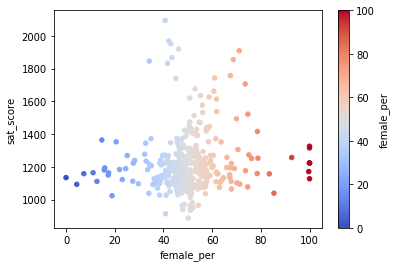

In [69]:
fig, ax = plt.subplots()
combined.plot.scatter(x="female_per",
                     y="sat_score",
                     c="female_per",
                     cmap="coolwarm",
                     ax=ax)

Thee is no real correaltion here, even though there is a tiny cluster of schools with high female percentages that are scoring very well with sat_score. However, we won't dive deep here - overall having identified a subset of schools explaining the correlation is good enough in understanding the corr() values identified before.

# Analyzing AP Examps and SAT
In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.
It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. **Because total_enrollment is highly correlated with sat_score**, we don't want to bias our results. Instead, we'll look at the **percentage of students in each school who took at least one AP exam**.

In [70]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

In [71]:
combined.corr()["sat_score"]["ap_per"]

0.05628131428225266

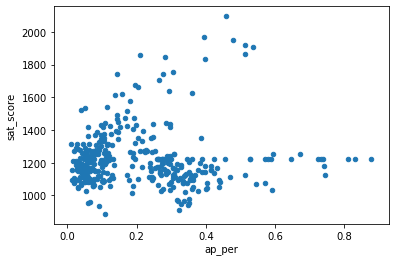

In [72]:
combined.plot.scatter(x="ap_per",
                     y = "sat_score")

Correlation is weak - AP tests are by no means a major driver of high sat scores.

# Conclusions
Overall we have identified a set of interesting findings in the data collected.
- SAT scores have a degree of correlation with **Enrollment of schools** (more popular schools = better ratings)
- The appearing racial inequality is explained by the fact that schools with high percentages of english language learners (ell_per) also gather high percentages of spanish speakers and black students.
- Some districts and areas in NYC report **lower sat_scores** (e.g. Brooklyn vs Manhattan / Queens)
- This is also related to the feeling of safety perceived by students and teachers in given areas. They run along the same lines.

# Potential next steps
- Determing wheter there's a correlation between class size and SAT scores  
- Figuring out which neighborhoods have the best schools  
- If we combine this information with a dataset containing property values, we could find the least expensive neighborhoods that have good schools.  
- Investigating the differences between parent, teacher, and student responses to surveys.  
- Assigning scores to schools based on sat_score and other attributes.  

